<a href="https://colab.research.google.com/github/DFelton88/Python-Coding/blob/master/Covid_19_11_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid 19 The Data was retrieve by GitHub, John Hospkins and the World Health Organization(WHO).
# Is it affected by the seasons? Is it Seasonal?

In [ ]:
import os, csv
import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import numpy as np
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [ ]:
matplotlib.units.registry

{bytes: <matplotlib.category.StrCategoryConverter at 0x7fa8ebe70f90>,
 datetime.date: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fa8e5720f90>,
 datetime.datetime: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fa8e5720210>,
 datetime.time: <pandas.plotting._matplotlib.converter.TimeConverter at 0x7fa8e5720e50>,
 decimal.Decimal: <matplotlib.units.DecimalConverter at 0x7fa8ebe70ed0>,
 numpy.bytes_: <matplotlib.category.StrCategoryConverter at 0x7fa8ebe70fd0>,
 numpy.datetime64: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fa8e5720e90>,
 numpy.str_: <matplotlib.category.StrCategoryConverter at 0x7fa8ebe70f50>,
 pandas._libs.tslibs.period.Period: <pandas.plotting._matplotlib.converter.PeriodConverter at 0x7fa8e57203d0>,
 pandas._libs.tslibs.timestamps.Timestamp: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fa8e5720350>,
 str: <matplotlib.category.StrCategoryConverter at 0x7fa8ebe70f10>}

In [ ]:
# This defines the default nation and series below
nation = 'US'
series = 'Confirmed'

In [ ]:
# Retrieve data via github
#datasource = 'https://github.com/CSSEGISandData/COVID-19.git'
datasource = 'https://github.com/mkitti/COVID-19.git'
if(os.path.isdir('csse_covid_19_data')):
  print('Data merged')
else:
  #subprocess.run(['git','clone',datasource])
  subprocess.run(['git','clone',datasource])
  os.chdir('COVID-19')
  subprocess.run(['git','checkout','lavery_notebook'])
  print('Data cloned')

Data merged


In [ ]:
covid19_dir = os.getcwd();
ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    'time_series_19-covid-{series}.csv'.format(series=series)    
)
[covid19_dir,
    ts_file];

In [ ]:
with open(ts_file, 'r') as csvfile:
    tsreader = csv.DictReader(csvfile)
    ts_data = list(tsreader)

In [ ]:
df = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
list(df.loc[:,'Country/Region']);

In [ ]:
nationrows = df.loc[:, 'Country/Region'] == nation
nationrows;

In [ ]:
nation_frame = df[nationrows]
nation_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,267,366,442,568,572,643,904,1076,1014,1376,1524,1793,1996,1996.0
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,220,328,421,525,732,967,1706,2495,5365,8310,11710,15793,15793.0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,177,221,282,340,426,557,698,751,952,1177,1364,1642,1642.0
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,95,108,123,138,164,197,218,218,328,413,525,646,646.0
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,36,42,42,44,44,44,45,45,45,45,45,45,45,45,46,46,46,46,46,46,47,47,47,47,49,49,49,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,5,5,5,5,14,21,23,23.0
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,5,12,14,15,27,27.0
448,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,3,3,NaN
491,United States Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0


In [ ]:
nation_frame.aggregate(np.sum)[-17:]

3/7/20       402
3/8/20       518
3/9/20       583
3/10/20      959
3/11/20     1281
3/12/20     1663
3/13/20     2179
3/14/20     2727
3/15/20     3499
3/16/20     4632
3/17/20     6421
3/18/20     7783
3/19/20    13677
3/20/20    19100
3/21/20    25489
3/22/20    33272
3/23/20    33276
dtype: object

In [ ]:
nation_series = nation_frame.agg(np.sum)[4:]
[type(nation_series),nation_series];

In [ ]:
strdates = nation_series.keys()
dates = [pd.to_datetime(sd) for sd in strdates]
[type(strdates),strdates,type(dates),dates,np.array(nation_series[:])];

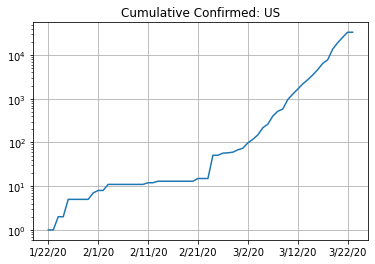

In [ ]:
nation_series.plot(logy=True, title=f'Cumulative {series}: {nation}')
plt.grid(True)

In [ ]:
# Load series into a dict of pandas dataframes
series_options = ['Confirmed','Deaths','Recovered']
#series_options = [re.match(r'time_series_19-covid-(.*).csv',file)[1] for file in os.listdir(os.path.join(

series_frames = dict();
for series_to_read in series_options:
  ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    f'time_series_19-covid-{series_to_read}.csv')
  series_frames[series_to_read] = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
    
series_frames.keys()

dict_keys(['Confirmed', 'Deaths', 'Recovered'])

In [ ]:
get_nation_series('US','Confirmed')
nation_series = get_nation_series(nation,series)[0]
nation_series_cache['US']['Confirmed']["3/23/20"]

33276.0

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving WHO COVID-19 global table data November 4th 2021 at 8.59.53 PM.csv to WHO COVID-19 global table data November 4th 2021 at 8.59.53 PM.csv


In [ ]:
WHO_Data = pd.read_csv('WHO COVID-19 global table data November 4th 2021 at 8.59.53 PM.csv',encoding='latin-1')

In [ ]:
WHO_Data.head()

,ï»¿Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,247968227,3181.306602,3045362,39.07045,479578,5020204,64.406671,49359,0.633251,7706
1,United States of America,Americas,45889496,13863.785000,527691,159.42200,75892,743140,224.512000,8693,2.626000,1426
2,India,South-East Asia,34321025,2487.023000,89216,6.46500,12885,459652,33.308000,3266,0.237000,461
3,Brazil,Americas,21821124,10265.894000,72140,33.93900,6431,608071,286.071000,1825,0.859000,149
4,The United Kingdom,Europe,9171664,13510.390000,274511,404.37100,40803,141181,207.968000,1140,1.679000,217


In [ ]:
WHO_Data.columns

Index(['ï»¿Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

In [ ]:
WHO_Data[WHO_Data['ï»¿Name'].str.contains('United')].head(1)

,ï»¿Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
1,United States of America,Americas,45889496,13863.785,527691,159.422,75892,743140,224.512,8693,2.626,1426


In [ ]:
WHO_Data.rename(columns={"ï»¿Name": "Country"})

,Country,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,247968227,3181.306602,3045362,39.07045,479578,5020204,64.406671,49359,0.633251,7706
1,United States of America,Americas,45889496,13863.785000,527691,159.42200,75892,743140,224.512000,8693,2.626000,1426
2,India,South-East Asia,34321025,2487.023000,89216,6.46500,12885,459652,33.308000,3266,0.237000,461
3,Brazil,Americas,21821124,10265.894000,72140,33.93900,6431,608071,286.071000,1825,0.859000,149
4,The United Kingdom,Europe,9171664,13510.390000,274511,404.37100,40803,141181,207.968000,1140,1.679000,217
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Pitcairn Islands,Western Pacific,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0
234,Saint Helena,Africa,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0
235,Tokelau,Western Pacific,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0
236,Turkmenistan,Europe,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0


In [ ]:
from google.colab import files

In [102]:
uploaded = files.upload()

Saving United States Covid Data 20 21.csv to United States Covid Data 20 21.csv


In [103]:
Covid_Dates = pd.read_csv('United States Covid Data 20 21.csv',encoding='latin-1')

In [104]:
Covid_Dates.columns

Index(['ï»¿Date', 'Country/Region', 'Province/State', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')

In [105]:
Covid_Dates.head()

,ï»¿Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,1/22/2020,US,NaN,1,0,0
1,1/23/2020,US,NaN,1,0,0
2,1/24/2020,US,NaN,2,0,0
3,1/25/2020,US,NaN,2,0,0
4,1/26/2020,US,NaN,5,0,0


In [106]:
Covid_Dates.shape

(646, 6)

In [107]:
Covid_Dates.info

<bound method DataFrame.info of         ï»¿Date Country/Region  Province/State  Confirmed  Recovered  Deaths
0     1/22/2020             US             NaN          1          0       0
1     1/23/2020             US             NaN          1          0       0
2     1/24/2020             US             NaN          2          0       0
3     1/25/2020             US             NaN          2          0       0
4     1/26/2020             US             NaN          5          0       0
..          ...            ...             ...        ...        ...     ...
641  10/24/2021             US             NaN   45444260          0  735941
642  10/25/2021             US             NaN   45547158          0  737342
643  10/26/2021             US             NaN   45627021          0  739090
644  10/27/2021             US             NaN   45726714          0  741582
645  10/28/2021             US             NaN   45826098          0  743358

[646 rows x 6 columns]>

In [139]:
Covid_Dates.rename(columns={'ï»¿Date': 'Date'})

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,1/22/2020,US,NaN,1,0,0
1,1/23/2020,US,NaN,1,0,0
2,1/24/2020,US,NaN,2,0,0
3,1/25/2020,US,NaN,2,0,0
4,1/26/2020,US,NaN,5,0,0
...,...,...,...,...,...,...
641,10/24/2021,US,NaN,45444260,0,735941
642,10/25/2021,US,NaN,45547158,0,737342
643,10/26/2021,US,NaN,45627021,0,739090
644,10/27/2021,US,NaN,45726714,0,741582


In [194]:
Covid_Dates = Covid_Dates[[  'ï»¿Date','Confirmed','Recovered','Deaths']]
Covid_Dates =Covid_Dates.dropna()
Covid_Dates.shape

(646, 4)

In [167]:
Covid_Dates.loc

In [153]:
Covid_Dates.columns

Index(['ï»¿Date', 'Country/Region', 'Province/State', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')

In [202]:
 Covid_Dates.head(90)

,ï»¿Date,Confirmed,Recovered,Deaths
0,1/22/2020,1,0,0
1,1/23/2020,1,0,0
2,1/24/2020,2,0,0
3,1/25/2020,2,0,0
4,1/26/2020,5,0,0
...,...,...,...,...
85,4/16/2020,682442,54703,36908
86,4/17/2020,715446,58545,39007
87,4/18/2020,743379,64840,40951
88,4/19/2020,769251,70337,42934


In [203]:
Covid_Dates.tail(90)

,ï»¿Date,Confirmed,Recovered,Deaths
556,7/31/2021,35037755,0,612948
557,8/1/2021,35079208,0,613161
558,8/2/2021,35199930,0,613522
559,8/3/2021,35302681,0,614105
560,8/4/2021,35399526,0,614638
...,...,...,...,...
641,10/24/2021,45444260,0,735941
642,10/25/2021,45547158,0,737342
643,10/26/2021,45627021,0,739090
644,10/27/2021,45726714,0,741582
